In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
df = pd.read_csv('/content/questions.csv', on_bad_lines='skip')


In [ ]:
df.shape

(404351, 6)

In [ ]:
df=df.sample(40000)

In [ ]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
!pip install beautifulsoup4

from bs4 import BeautifulSoup
import re


In [ ]:


def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with words
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar')
    q = q.replace('₹', ' rupee')
    q = q.replace('€', ' euro')
    q = q.replace('@', ' at')
    q = q.replace('[math]', '')
    q = q.replace(',000,000,000', 'b')
    q = q.replace(',000,000', 'm')
    q = q.replace(',000', 'k')

    # Replace large numbers with abbreviations
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "i would",
        "i'll": "i will",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }

    # Apply contractions
    q_decontracted = []
    for word in q.split():
        q_decontracted.append(contractions.get(word, word))
    q = ' '.join(q_decontracted)

    # Remove HTML tags
    q = BeautifulSoup(q, 'html.parser').get_text()

    # Remove punctuations and extra spaces
    q = re.sub(r'\W+', ' ', q).strip()

    return q


In [ ]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already wasn t done'

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
267908,267908,490547,527002,what are the best business school case studies,what is the best business case studies,1
189095,189095,373349,373350,donald trump brags about sexually assaulting w...,how many women are claiming to have been sexua...,1
251714,251714,495550,495551,i want to make video games what should i major...,i want to make a mental hospital what should i...,0
174284,174284,344330,344331,what is 21st century teaching,is this the 21st century,0
233743,233743,460519,460520,what is the validation code neteller asking,execs what s the best way to ask you whether y...,0


In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:

new_df = df.sample(30000,random_state=2)

In [ ]:
import nltk

# Download stopwords
nltk.download('stopwords')

# Now you can import and use them
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(list(stop_words)[:10])  # sample output


['such', 'then', 'hasn', 'very', "aren't", "they'll", 'if', 'than', "wasn't", 'where']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


ModuleNotFoundError: No module named 'distance'

In [ ]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head()

In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [ ]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])


In [ ]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [ ]:
df.isnull().sum()
df['question1'] = df['question1'].fillna('')
df['question2'] = df['question2'].fillna('')
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


is_duplicate
0    25235
1    14765
Name: count, dtype: int64
is_duplicate
0    63.0875
1    36.9125
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

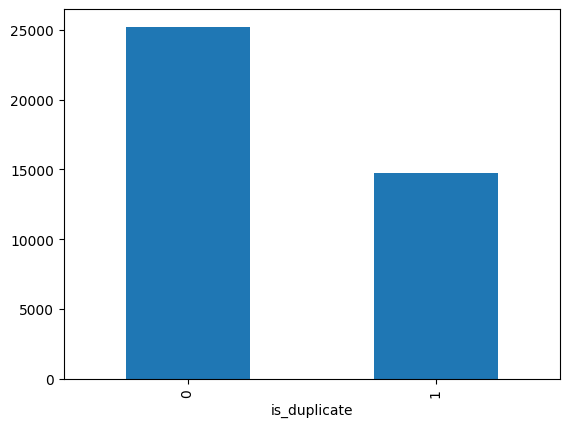

In [ ]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
#repited question pairs
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique question',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of question getting repeted',x[x].shape[0])

Number of unique question 79710
Number of question getting repeted 262


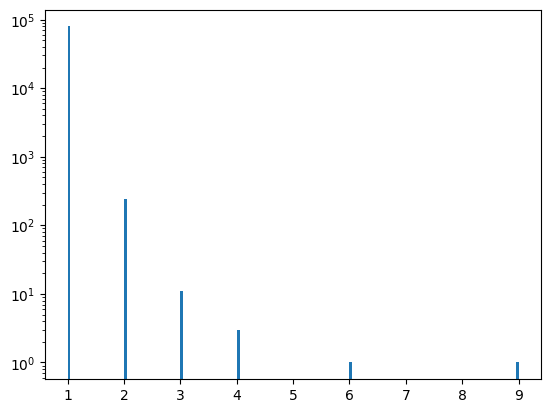

In [ ]:
#repeted question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
new_df=df[['question1','question2']]
new_df.head()


,question1,question2
378599,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...
185360,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ..."
202680,How do I get my old WeChat account back?,How do I get back my WeChat account?
256363,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...
107349,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(new_df['question1']) + list(new_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=df.index)
temp_df2=pd.DataFrame(q2_arr,index=df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape


(40000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
378599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288327,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
12546,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
358788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df['is_duplicate'] = df['is_duplicate']

In [ ]:
print(temp_df.columns)


Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,
       ...
                 2991,           2992,           2993,           2994,
                 2995,           2996,           2997,           2998,
                 2999, 'is_duplicate'],
      dtype='object', length=6001)


In [ ]:
print(temp_df.columns)

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,
       ...
                 2991,           2992,           2993,           2994,
                 2995,           2996,           2997,           2998,
                 2999, 'is_duplicate'],
      dtype='object', length=6001)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.743125

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)



0.723875

In [ ]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
378599,378599,740527,740528,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...,0,59,116
185360,185360,366039,366040,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ...",0,80,76
202680,202680,399912,399913,How do I get my old WeChat account back?,How do I get back my WeChat account?,1,40,36
256363,256363,504600,504601,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...,0,87,51
107349,107349,212899,212900,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...,1,70,69


In [ ]:
df['q1_num_words']=df['question1'].apply(lambda row:len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row:len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
378599,378599,740527,740528,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...,0,59,116,14,23
185360,185360,366039,366040,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ...",0,80,76,14,14
202680,202680,399912,399913,How do I get my old WeChat account back?,How do I get back my WeChat account?,1,40,36,9,8
256363,256363,504600,504601,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...,0,87,51,12,11
107349,107349,212899,212900,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...,1,70,69,15,14


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
    return len(w1 & w2)


In [ ]:
df['word_common'] = df.apply(common_words, axis=1)
df.head(20)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
378599,378599,740527,740528,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...,0,59,116,14,23,7
185360,185360,366039,366040,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ...",0,80,76,14,14,13
202680,202680,399912,399913,How do I get my old WeChat account back?,How do I get back my WeChat account?,1,40,36,9,8,6
256363,256363,504600,504601,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...,0,87,51,12,11,4
107349,107349,212899,212900,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...,1,70,69,15,14,13
122543,122543,242832,242833,How do I know that she actually loves you?,How do you know if she loves you or just needs...,0,42,51,9,12,6
81114,81114,161125,161126,What should be the name of gaming channel on Y...,What is a good name for a YouTube gaming channel?,1,53,49,10,10,3
231885,231885,456900,456901,How do you feel about plastic surgery?,How does it feel to have plastic surgery?,0,38,41,7,8,4
111505,111505,221102,221103,What's the most interesting joke?,What is the best joke you know?,0,33,31,5,7,1
395229,395229,772340,772341,How can I get beautiful skin?,What is the job outlook as a Northcentral Univ...,0,29,62,6,10,0


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) +len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q1,q4))

In [ ]:
cv

In [ ]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
378599,378599,740527,740528,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...,0,59,116,14,23,7,36
185360,185360,366039,366040,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ...",0,80,76,14,14,13,28
202680,202680,399912,399913,How do I get my old WeChat account back?,How do I get back my WeChat account?,1,40,36,9,8,6,17
256363,256363,504600,504601,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...,0,87,51,12,11,4,22
107349,107349,212899,212900,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...,1,70,69,15,14,13,29


In [ ]:
df['word_share'] = round(df['word_common'] / df['word_total'], 2)
df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
378599,378599,740527,740528,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...,0,59,116,14,23,7,36,0.19
185360,185360,366039,366040,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ...",0,80,76,14,14,13,28,0.46
202680,202680,399912,399913,How do I get my old WeChat account back?,How do I get back my WeChat account?,1,40,36,9,8,6,17,0.35
256363,256363,504600,504601,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...,0,87,51,12,11,4,22,0.18
107349,107349,212899,212900,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...,1,70,69,15,14,13,29,0.45


minimum charackters 1
maximum charackters 310
avarge num of charecters 59


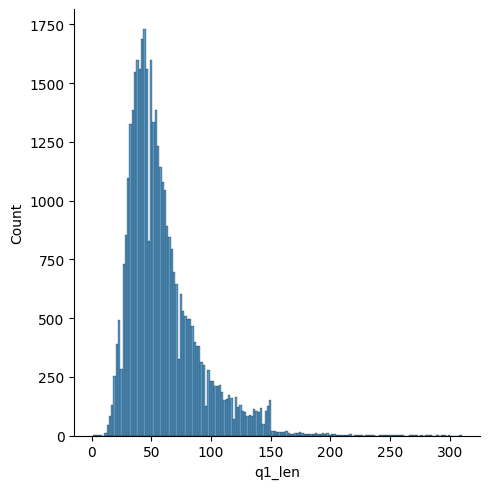

In [ ]:
sns.displot(df['q1_len'])
print('minimum charackters',df['q1_len'].min())
print('maximum charackters',df['q1_len'].max())
print('avarge num of charecters',int(df['q1_len'].mean()))

minimum charackters 1
maximum charackters 481
avarge num of charecters 60


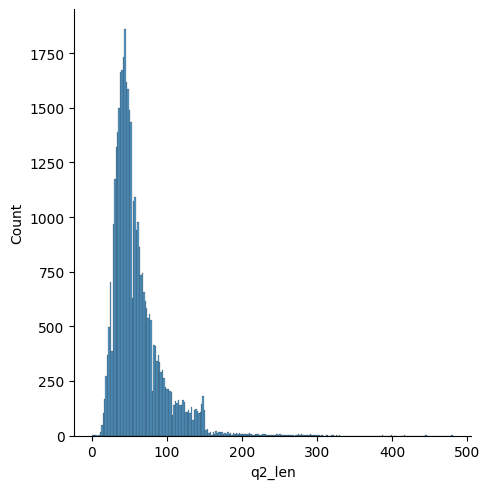

In [ ]:
sns.displot(df['q2_len'])
print('minimum charackters',df['q2_len'].min())
print('maximum charackters',df['q2_len'].max())
print('avarge num of charecters',int(df['q2_len'].mean()))

minimum charackters 1
maximum charackters 66
avarge num of charecters 10


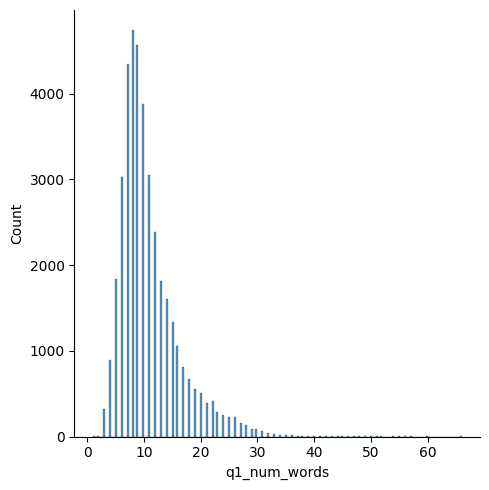

In [ ]:
sns.displot(df['q1_num_words'])
print('minimum charackters',df['q1_num_words'].min())
print('maximum charackters',df['q1_num_words'].max())
print('avarge num of charecters',int(df['q1_num_words'].mean()))

minimum charackters 1
maximum charackters 97
avarge num of charecters 11


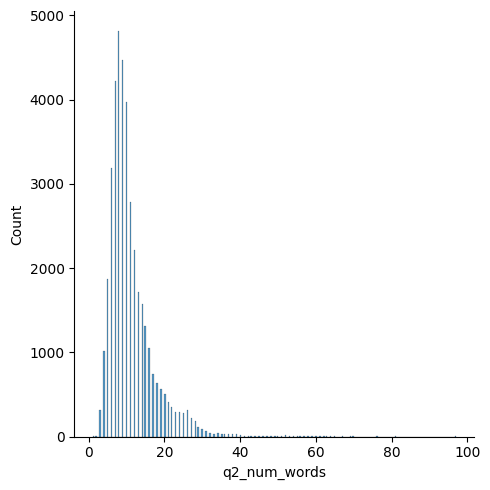

In [ ]:
sns.displot(df['q2_num_words'])
print('minimum charackters',df['q2_num_words'].min())
print('maximum charackters',df['q2_num_words'].max())
print('avarge num of charecters',int(df['q2_num_words'].mean()))

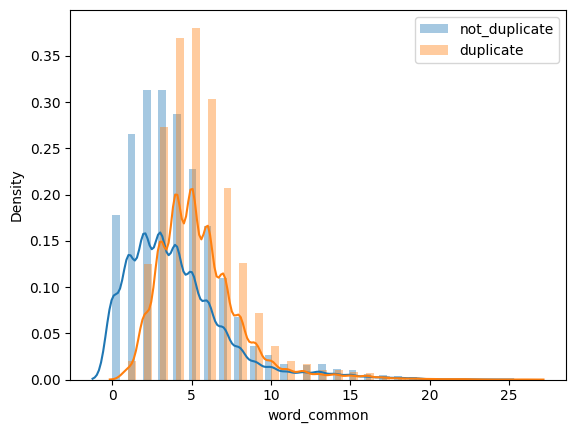

In [ ]:
#common words
sns.distplot(df[df['is_duplicate']==0]['word_common'],label='not_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

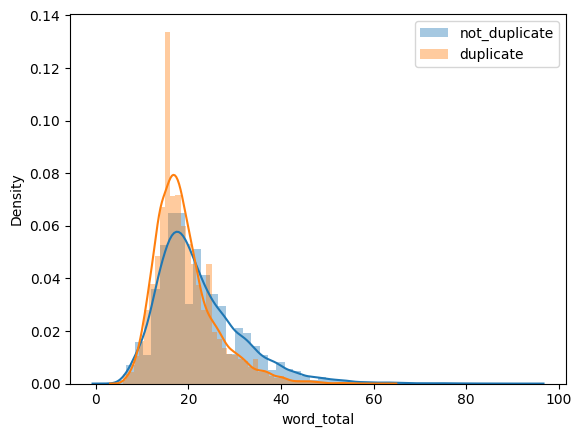

In [ ]:
#total words
sns.distplot(df[temp_df['is_duplicate']==0]['word_total'],label='not_duplicate')
sns.distplot(df[temp_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()


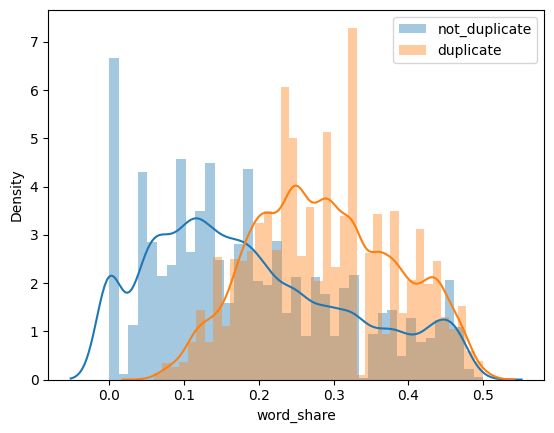

In [ ]:
#word_share
sns.distplot(df[temp_df['is_duplicate']==0]['word_share'],label='not_duplicate')
sns.distplot(df[temp_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
378599,What are the pros and cons of a bias cut vs a ...,What are pros and cons of a sleeping duck matt...
185360,"What is the location of Palawan, and how does ...","What is the location of Palawan, and how does ..."
202680,How do I get my old WeChat account back?,How do I get back my WeChat account?
256363,What is the difference between Indian Official...,How do I differ between 0 and O in Indian pass...
107349,What are a few inexpensive home decor ideas wh...,What are a few inexpensive home decor ideas wh...


In [ ]:
final_df=df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

NameError: name 'df' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=df.index)
temp_df2=pd.DataFrame(q2_arr,index=df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(40000, 6000)

In [ ]:
import pandas as pd

final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

NameError: name 'final_df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

NameError: name 'final_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
impact whith less points


SyntaxError: invalid syntax (ipython-input-3112722387.py, line 1)